In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

# load data
df = pd.read_csv(
    'WorldHappinessReport2025.csv',
    encoding='latin1',  
    sep=';'  
)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1969 non-null   int64  
 1   Rank                                        1969 non-null   int64  
 2   Country name                                1969 non-null   object 
 3   Life evaluation (3-year average)            1969 non-null   float64
 4   Lower whisker                               875 non-null    float64
 5   Upper whisker                               875 non-null    float64
 6   Explained by: Log GDP per capita            872 non-null    float64
 7   Explained by: Social support                872 non-null    float64
 8   Explained by: Healthy life expectancy       870 non-null    float64
 9   Explained by: Freedom to make life choices  871 non-null    float64
 10  Explained by: Gen

## data clean up

In [2]:
df=df.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
    'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
    'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
    'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'])

In [3]:
import numpy as np
df = df[np.isfinite(df['Year']) & np.isfinite(df['Rank'])] #integer or float

df['Year'] = df['Year'].astype(int)
df['Rank'] = df['Rank'].astype(int)

In [4]:
df= df.dropna()
df.to_csv('cleaned_data.csv', index=False)

In [5]:
len(df['Country name'])

868

In [6]:
df_regions=pd.read_csv("countries_continents.csv")
df_regions.columns= ["Region", "Country name"]



In [7]:
df_merge=df.merge(df_regions,on= 'Country name',how='left')

## Exploratory Data Analysis

### 1. Which are the top 10 happiest countries in 2024?

In [8]:
df_2024 = df_merge[df_merge['Year'] == 2024]
top_10_approx = df_2024.sort_values('Life evaluation (3-year average)', ascending=False).head(10)[['Country name', 'Life evaluation (3-year average)']]
top_10_approx

,Country name,Life evaluation (3-year average)
246,Finland,7.736
197,Denmark,7.521
326,Iceland,7.515
740,Sweden,7.345
559,Netherlands,7.306
167,Costa Rica,7.274
598,Norway,7.262
362,Israel,7.234
461,Luxembourg,7.122
511,Mexico,6.979


C:\Users\HP\AppData\Local\Temp\ipykernel_10300\2392023886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_approx,


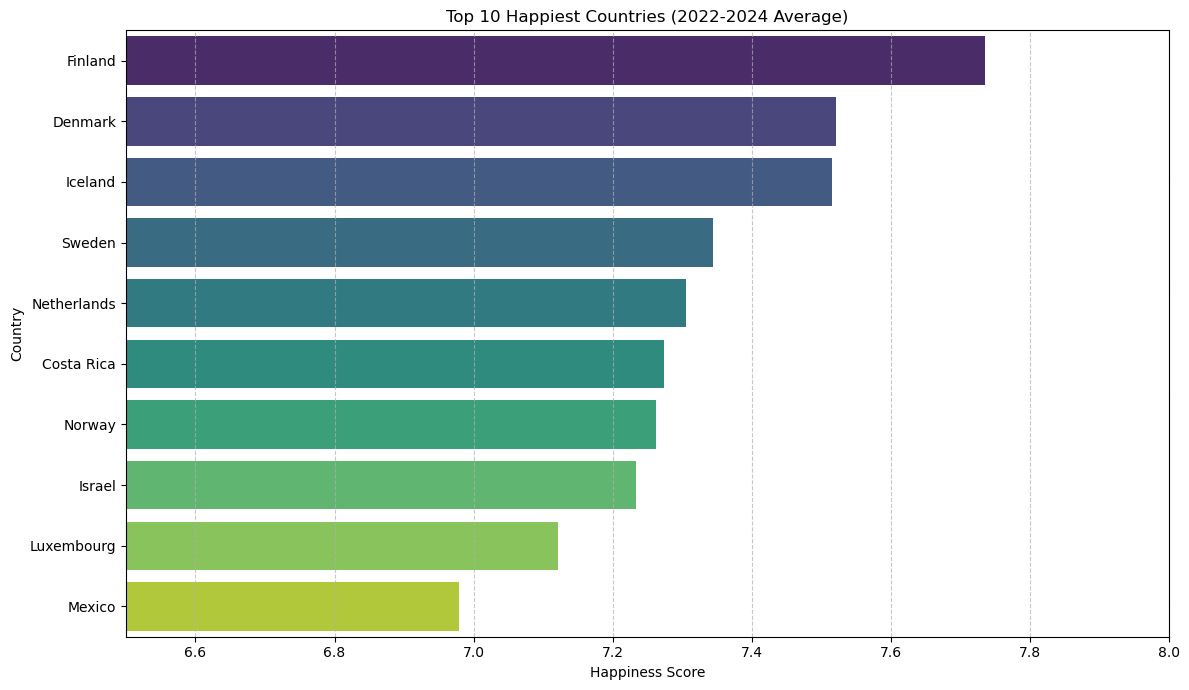

In [9]:
# plot
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_approx, 
            y='Country name', 
            x='Life evaluation (3-year average)', 
            palette='viridis')  

plt.title('Top 10 Happiest Countries (2022-2024 Average)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.xlim(6.5, 8) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<small>
From the above figure we conclude that the Nordic countries dominate the top ranks, with Finland leading for the eighth consecutive year due to strong social support, low corruption, and excellent work-life balance.We also observe a surprising rise of Latin American nations like Costa Rica (6th) and Mexico (10th), showing that strong family ties and social connections can outweigh lower GDP in driving happiness.
</small>

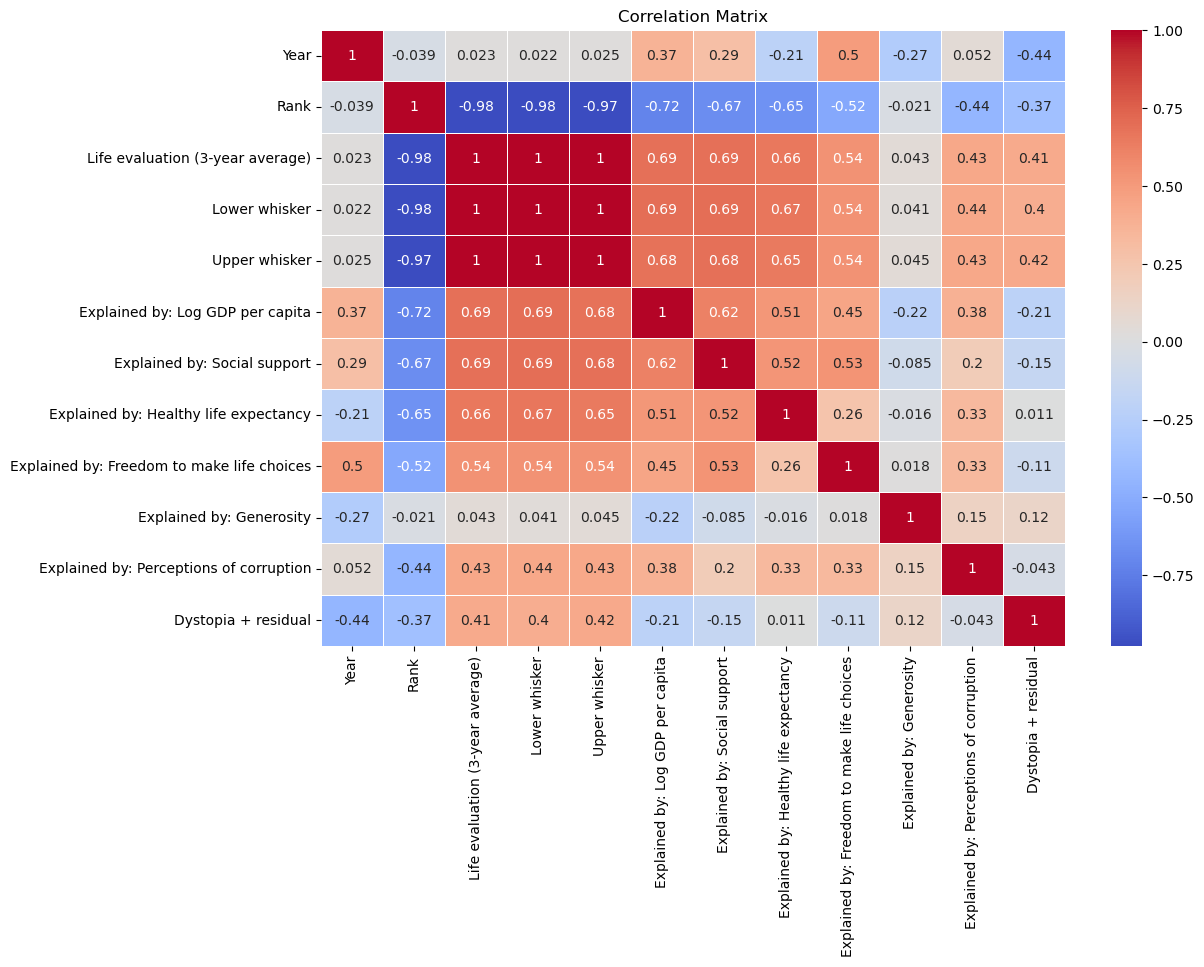

In [10]:
numeric_columns=df_merge.select_dtypes(include=['float64','Int64']).columns

corr_matrix=df_merge[numeric_columns].corr()

# plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<small>
From the correlation matrix, we conclude that happiness score (Life evaluation) is strongly negatively correlated with Rank , confirming that higher scores directly improve rankings, and moderately to strongly positively correlated with Log GDP per capita, Social support, and Healthy life expectancy , showing these are the main drivers of national happiness differences.Freedom to make life choices and Perceptions of corruption also contribute meaningfully , while Generosity has almost no correlation , indicating it plays a very minor role compared to economic, social, and health factors.Year shows weak correlations with most variables, suggesting limited overall time trends in the dataset, though some negative links (e.g., with Dystopia + residual) hint at evolving unexplained factors across years.
</small>

### 2. How strongly does a country's GDP affect its happiness level?
How much does a country's wealth (GDP) affect how happy its people feel?



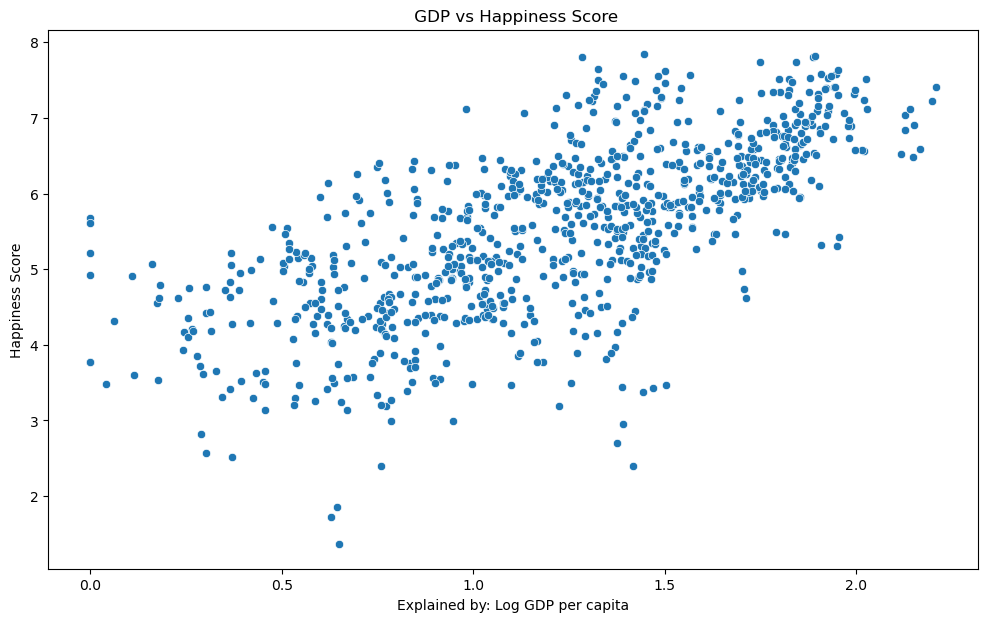

In [11]:
# plot

plt.figure(figsize=(12, 7))
sns.scatterplot(x='Explained by: Log GDP per capita', y='Life evaluation (3-year average)', data=df_merge)
plt.ylabel('Happiness Score')
plt.title(' GDP vs Happiness Score')
plt.show()

<small>
From the above figure, we can see GDP per capita shows a strong positive relationship with Happiness Score, with diminishing returns at higher income levels.Wealth explains much of cross-country happiness variation, though other factors cause noticeable scatter.
</small>

### 3. What are the regional differences in average happiness scores?

C:\Users\HP\AppData\Local\Temp\ipykernel_10300\168303303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_LifeLadder_by_region,x='Region', y='Life evaluation (3-year average)',palette='viridis')


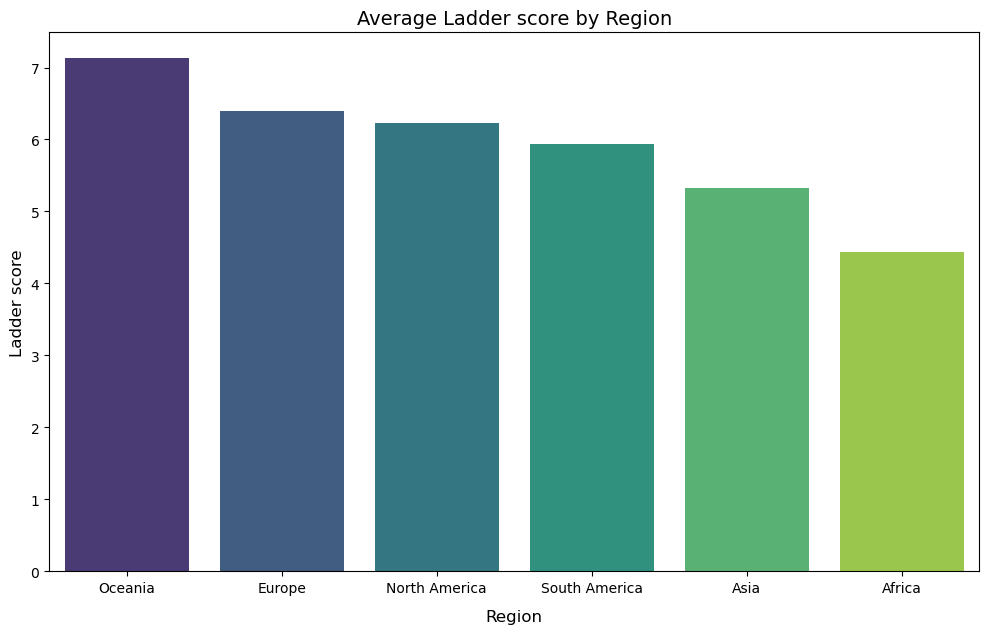

In [12]:
avg_LifeLadder_by_region=(df_merge.groupby('Region')['Life evaluation (3-year average)'].mean()
                        .sort_values(ascending=False).reset_index())

# plot
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_LifeLadder_by_region,x='Region', y='Life evaluation (3-year average)',palette='viridis')
plt.title('Average Ladder score by Region',fontsize=14)
plt.xlabel('Region',fontsize=12,labelpad=10)
plt.ylabel("Ladder score",fontsize=12)
# plt.xticks(rotation=45, ha='right')
plt.show()


<small> From this bar chart, we conclude that Oceania leads with the highest average happiness score , followed by Europe and North America, while Africa has the lowest , highlighting significant global well-being gaps between wealthier and developing regions </small>



### 4. How does generosity vary across countries over time?



In [13]:
plt.figure(figsize=(14, 8))
fig = px.choropleth (df_merge.sort_values('Year'),
                    locations='Country name',
                    color='Explained by: Generosity',
                    locationmode='country names',
                    animation_frame='Year',
                    color_continuous_scale='YlOrRd')
fig.update_layout(title = "Generosity Comparison by Countries")
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10300\1644222161.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth (df_merge.sort_values('Year'),


<Figure size 1400x800 with 0 Axes>

<small>
From the choropleth map, generosity contributes modestly to happiness levels  with higher values in parts of Asia (e.g., India, Indonesia), Africa, and some Middle Eastern countries, while most Western nations show lower generosity impact on overall life evaluation scores
</small>

### 5. How does freedom to choose life decisions correlate with happiness scores across regions?



In [14]:

pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_40826.csv", skiprows=3)


pop_df.columns = pop_df.columns.str.strip().str.replace('"', '').str.replace("'", "")

pop_df = pop_df.rename(columns={
    'Country Name': 'Country name',   
        'Year': 'Year'

})

pop_df = pop_df.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 69','Country Code'], errors='ignore')


id_vars = ['Country name']          

value_vars = [col for col in pop_df.columns if col.isdigit()]

# convert wide format to long format
long_df = pd.melt(
    pop_df,
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='Year',
    value_name='Population'
)

# data clean up
long_df['Year'] = long_df['Year'].astype(int)
long_df = long_df.dropna(subset=['Population'])
long_df = long_df.sort_values(['Country name', 'Year'])
long_df = long_df.reset_index(drop=True)

long_df_recent = long_df[long_df['Year'] >= 2019]



In [15]:

df_final = df_merge.merge(
    long_df_recent[['Country name', 'Year', 'Population']],   
    on=['Country name', 'Year'],                              
    how='left'
)

# data clean up 
df_final = df_final.dropna(subset=['Population'])
df_final['Population']=df_final['Population'].astype('int64')





In [16]:
# plot 
plt.figure(figsize=(16, 9))
fig =  px.scatter (  df_final,
                    x='Explained by: Freedom to make life choices',
                    y='Life evaluation (3-year average)',
                    animation_frame='Year',
                    animation_group='Country name',
                    size = 'Population',
                    template = "plotly_dark",
                    color = 'Region', 
                    hover_name = "Country name", 
                    size_max = 60,
                    category_orders={"Year": sorted(df_final['Year'].unique())},
                    labels={
                    'Explained by: Freedom to make life choices': 'Freedom to Choose',  
                    'Life evaluation (3-year average)': 'Life Ladder'                  
    }
)
fig.update_layout(title = "Life Ladder and Freedom Comparison by Countries")
fig.show()



<Figure size 1600x900 with 0 Axes>

<small>
From this figure, we conclude that higher freedom to make life choices is strongly associated with higher life ladder (happiness) scores, with Europe and Oceania showing the strongest positive relationship, while Africa and parts of Asia tend to cluster at lower levels of both freedom and happiness
<small>

<small></small>

### 6. How does healthy life expectancy correlate with happiness in developing regions?

In [ ]:
developing_regions=['Asia', 'Africa','South America']
df_dev=df_final[df_final['Region'].isin(developing_regions)]

# plot
fig = px.scatter(
    df_dev,
    x='Explained by: Healthy life expectancy',
    y='Life evaluation (3-year average)',
    color='Region',
    hover_name='Country name',
    trendline='ols',                     
    trendline_scope= 'overall',
    template='plotly_dark',
    title='Healthy Life Expectancy vs Happiness in Developing Regions',
    labels={
        'Explained by: Healthy life expectancy': 'Healthy Life Expectancy (years)',
        'Life evaluation (3-year average)': 'Happiness Score (Life Ladder)'
    }
)

fig.show()

<small>
From this figure, we conclude that in developing regions, higher healthy life expectancy is positively correlated with higher happiness scores, with Asia and South America showing stronger improvements compared to Africa
</small>

### 7. What role does social support play in overall happiness rankings?

In [ ]:
correlation=df_final['Explained by: Social support'].corr(
    df_final['Life evaluation (3-year average)']
)

print(f"Correlation: {correlation:.3f}")

Correlation: 0.711


<small>
From this code, we conclude that social support has a strong positive correlation (r = 0.711) with life evaluation, indicating that higher perceived social support significantly contributes to greater overall happiness.

</small>

In [21]:
# plot
fig = px.scatter(
    df_final,
    x='Explained by: Social support',
    y='Life evaluation (3-year average)',
    color='Region',
    size='Population',
    hover_name='Country name',
    animation_frame='Year',
    animation_group='Country name',
    trendline='ols',                     
    trendline_scope='overall',
    trendline_color_override='purple',   
    template='plotly_dark',
    title='Role of Social Support in Happiness Rankings (2019–2024)',
    category_orders={"Year": sorted(df_final['Year'].unique())},
    labels={
        'Explained by: Social support': 'Social Support (0–1)',
        'Life evaluation (3-year average)': 'Happiness Score (Life Ladder)'
    },
    size_max=55
)

fig.update_layout(
    xaxis_title="Social Support Score",
    yaxis_title="Happiness Score (Life Ladder)",
    showlegend=True
)

fig.show()

<small>
From this plot, we conclude that through years, higher social support scores are strongly and positively correlated with higher happiness rankings across all regions

</small>